**title: "Bulk rnaseq_mazzolini_foranna (Analysis for my PhD supervisor)"
author: "Lai, Kei Onn
date: "12/30/2022"**

dataset derived from count data of https://doi.org/10.1002/glia.23717
provided by original authors of the paper. 
Here i mainly focus on performing an LRT instead of wald statistic test since it's a time series model

read in the file; tab contains both metadata and count matrix

In [1]:
setwd("C:/Users/Kei Onn/Downloads")

.libPaths("C:/Program Files/R/R-4.2.1/library")


In [2]:
tab<-read.csv("count_bulk_ZF_Mazzolini.csv")
head(tab)

sample               gene_id            count gene_name sample_group
1 uz_hras_3dpf_16_5_17 ENSDARG00000000001   10  slc35a5   3dpf        
2 uz_hras_3dpf_16_5_17 ENSDARG00000000002 2964  ccdc80    3dpf        
3 uz_hras_3dpf_16_5_17 ENSDARG00000000018  194  nrf1      3dpf        
4 uz_hras_3dpf_16_5_17 ENSDARG00000000019 2191  ube2h     3dpf        
5 uz_hras_3dpf_16_5_17 ENSDARG00000000068   68  slc9a3r1a 3dpf        
6 uz_hras_3dpf_16_5_17 ENSDARG00000000069  548  dap       3dpf

Extract out the metadata and gene annotations

In [3]:
metadata<-tab[,c("sample","sample_group")]
head(metadata)

sample               sample_group
1 uz_hras_3dpf_16_5_17 3dpf        
2 uz_hras_3dpf_16_5_17 3dpf        
3 uz_hras_3dpf_16_5_17 3dpf        
4 uz_hras_3dpf_16_5_17 3dpf        
5 uz_hras_3dpf_16_5_17 3dpf        
6 uz_hras_3dpf_16_5_17 3dpf

Extract out the count matrix (originally, this is in the long format)

In [4]:
countlong<-tab[c("sample","gene_id","count")]
head(countlong)

sample               gene_id            count
1 uz_hras_3dpf_16_5_17 ENSDARG00000000001   10 
2 uz_hras_3dpf_16_5_17 ENSDARG00000000002 2964 
3 uz_hras_3dpf_16_5_17 ENSDARG00000000018  194 
4 uz_hras_3dpf_16_5_17 ENSDARG00000000019 2191 
5 uz_hras_3dpf_16_5_17 ENSDARG00000000068   68 
6 uz_hras_3dpf_16_5_17 ENSDARG00000000069  548

In [5]:
library(stats)
countmatrix<-reshape(data=countlong,idvar="gene_id",timevar = "sample",direction = "wide")
rownames(countmatrix)=countmatrix$gene_id
countmatrix=subset(countmatrix, select=-c(gene_id))
head(countmatrix)

count.uz_hras_3dpf_16_5_17 count.uz_hras_3dpf_9_3_17
ENSDARG00000000001   10                          4                     
ENSDARG00000000002 2964                       2845                     
ENSDARG00000000018  194                        251                     
ENSDARG00000000019 2191                       1657                     
ENSDARG00000000068   68                        303                     
ENSDARG00000000069  548                       1928                     
                   count.uz_hras_3dpf_9_5_17 count.uz_hras_5dpf_11_5_17
ENSDARG00000000001   20                        38                      
ENSDARG00000000002  411                       672                      
ENSDARG00000000018  181                       673                      
ENSDARG00000000019 2574                      1223                      
ENSDARG00000000068 2598                       247                      
ENSDARG00000000069 3849                        68                      
                   count.uz_hras_5dpf_4_5_17_1 count.uz_hras_5dpf_4_5_17_2
ENSDARG00000000001   64                           2                       
ENSDARG00000000002  347                        1532                       
ENSDARG00000000018  686                         405                       
ENSDARG00000000019 2208                        2165                       
ENSDARG00000000068  258                         975                       
ENSDARG00000000069   41                         290                       
                   count.uz_hras_7dpf_13_4_17 count.uz_hras_7dpf_20_4_17
ENSDARG00000000001 1082                       342                       
ENSDARG00000000002  176                        70                       
ENSDARG00000000018  576                       273                       
ENSDARG00000000019 2929                       884                       
ENSDARG00000000068  194                        48                       
ENSDARG00000000069   59                       504                       
                   count.uz_hras_7dpf_27_4_17
ENSDARG00000000001   10                      
ENSDARG00000000002   12                      
ENSDARG00000000018  378                      
ENSDARG00000000019 4223                      
ENSDARG00000000068  880                      
ENSDARG00000000069   57

bit of data wrangling to clean the colnames 

In [6]:

names(countmatrix) = gsub(pattern = "count.", replacement = "", x = names(countmatrix))



In [7]:
# for a sanity check
head(countmatrix)

uz_hras_3dpf_16_5_17 uz_hras_3dpf_9_3_17 uz_hras_3dpf_9_5_17
ENSDARG00000000001   10                    4                  20               
ENSDARG00000000002 2964                 2845                 411               
ENSDARG00000000018  194                  251                 181               
ENSDARG00000000019 2191                 1657                2574               
ENSDARG00000000068   68                  303                2598               
ENSDARG00000000069  548                 1928                3849               
                   uz_hras_5dpf_11_5_17 uz_hras_5dpf_4_5_17_1
ENSDARG00000000001   38                   64                 
ENSDARG00000000002  672                  347                 
ENSDARG00000000018  673                  686                 
ENSDARG00000000019 1223                 2208                 
ENSDARG00000000068  247                  258                 
ENSDARG00000000069   68                   41                 
                   uz_hras_5dpf_4_5_17_2 uz_hras_7dpf_13_4_17
ENSDARG00000000001    2                  1082                
ENSDARG00000000002 1532                   176                
ENSDARG00000000018  405                   576                
ENSDARG00000000019 2165                  2929                
ENSDARG00000000068  975                   194                
ENSDARG00000000069  290                    59                
                   uz_hras_7dpf_20_4_17 uz_hras_7dpf_27_4_17
ENSDARG00000000001 342                    10                
ENSDARG00000000002  70                    12                
ENSDARG00000000018 273                   378                
ENSDARG00000000019 884                  4223                
ENSDARG00000000068  48                   880                
ENSDARG00000000069 504                    57

In [8]:
library(AnnotationHub)
library(ensembldb)
# Connect to AnnotationHub
ah <- AnnotationHub()

# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Danio rerio", "EnsDb"), 
              ignore.case = TRUE)



# Acquire the latest annotation files
id <- ahDb %>%
        mcols() %>%
        rownames() %>%
        tail(n = 1)

# Download the appropriate Ensembldb database
edb <- ah[[id]]

# Extract gene-level information from database
annotations <- genes(edb, 
                     return.type = "data.frame")

# Select annotations of interest
annotations <- annotations %>%
        dplyr::select(gene_id, gene_name, seq_name, gene_biotype, description)
saveRDS(annotations,file="ZFannotaions_ensdb.rds")

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: BiocFileCache

Loading required package: dbplyr

Warning message:
"package 'dbplyr' was built under R version 4.2.2"
Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading requir

metadata has alot of replications in rows

In [9]:
dim(metadata)
head(metadata)

[1] 288513      2

sample               sample_group
1 uz_hras_3dpf_16_5_17 3dpf        
2 uz_hras_3dpf_16_5_17 3dpf        
3 uz_hras_3dpf_16_5_17 3dpf        
4 uz_hras_3dpf_16_5_17 3dpf        
5 uz_hras_3dpf_16_5_17 3dpf        
6 uz_hras_3dpf_16_5_17 3dpf

In [10]:
suppressPackageStartupMessages(library(dplyr))
metadata<-metadata %>% distinct()
metadata <- metadata[-which(metadata$sample_group == ""), ]  #removing those samples not categorised as a sample group

metadata$sample_group<-factor(metadata$sample_group)

head(metadata)

Warning message:
"package 'dplyr' was built under R version 4.2.2"


sample                sample_group
1  uz_hras_3dpf_16_5_17  3dpf        
3  uz_hras_3dpf_9_3_17   3dpf        
5  uz_hras_3dpf_9_5_17   3dpf        
7  uz_hras_5dpf_11_5_17  5pdf        
9  uz_hras_5dpf_4_5_17_1 5pdf        
11 uz_hras_5dpf_4_5_17_2 5pdf

time to create the summarized expt object.

first ensure that countmatrix same order as metadata

In [11]:
library(DESeq2)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.2"

Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count


The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, row

In [12]:
all(metadata$sample == colnames(countmatrix))

[1] TRUE

In [13]:
#merge countmatrix with 

In [14]:
dds <- DESeqDataSetFromMatrix(countData = countmatrix,
                              colData = metadata,
                              design = ~ sample_group)

sample group has 3 replicate.
we filter at least total 10 reads across 3 samples

In [15]:
keep <- rowSums(counts(dds) >= 10) >= 3
dds <- dds[keep,]

3dpf is my reference group for contrast

In [16]:
dds$sample_group <- relevel(dds$sample_group, ref = "3dpf")

To get the genes that change at any time point 

In [17]:
design(dds) <- ~sample_group
dds <- DESeq(dds, test="LRT", reduced=~1)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [18]:
LRTres <- results(dds, alpha = 0.05)
resultsNames(dds)
head(LRTres)

[1] "Intercept"                 "sample_group_5pdf_vs_3dpf"
[3] "sample_group_7dpf_vs_3dpf"

log2 fold change (MLE): sample group 7dpf vs 3dpf 
LRT p-value: '~ sample_group' vs '~ 1' 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000000001   192.984       5.942780  1.456822 14.681390 0.000648599
ENSDARG00000000002   898.419      -4.214695  1.060285 12.193110 0.002250607
ENSDARG00000000018   406.393       1.308132  0.730844  6.695706 0.035159764
ENSDARG00000000019  2076.279       0.575256  0.696054  0.682220 0.710980713
ENSDARG00000000068   502.769      -1.110373  1.190163  0.850134 0.653726048
ENSDARG00000000069   628.775      -2.854233  1.077600 12.473374 0.001956326
                        padj
                   <numeric>
ENSDARG00000000001 0.0121088
ENSDARG00000000002 0.0292915
ENSDARG00000000018 0.1780266
ENSDARG00000000019 0.8576565
ENSDARG00000000068 0.8266271
ENSDARG00000000069 0.0265492

library(AnnotationHub)
library(ensembldb)
#Connect to AnnotationHub
ah <- AnnotationHub()

#Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Danio rerio", "EnsDb"), 
              ignore.case = TRUE)



#Acquire the latest annotation files
id <- ahDb %>%
        mcols() %>%
        rownames() %>%
        tail(n = 1)

#Download the appropriate Ensembldb database
edb <- ah[[id]]

#Extract gene-level information from database
annotations <- genes(edb, 
                     return.type = "data.frame")

#Select annotations of interest
annotations <- annotations %>%
        dplyr::select(gene_id, gene_name, seq_name, gene_biotype, description)
saveRDS(annotations,file="ZFannotaions_ensdb.rds")

creating a gene list containg ensbl id and gene name

#this is the ZF annotation extracted from Annoation hub
#ZFannotaions_ensdb <- readRDS("C:/Users/Kei Onn/Downloads/ZFannotaions_ensdb.rds")

we extract the genes name for genes in count matrix

In [19]:
annotations<-readRDS("C:/Users/Kei Onn/Downloads/ZFannotaions_ensdb.rds")
head(annotations)
dim(annotations)

gene_id            gene_name  seq_name gene_biotype  
1 ENSDARG00000099104 rpl24      1        protein_coding
2 ENSDARG00000102407 cep97      1        protein_coding
3 ENSDARG00000102097 nfkbiz     1        protein_coding
4 ENSDARG00000099319 CU651657.1 1        protein_coding
5 ENSDARG00000099640 eed        1        protein_coding
6 ENSDARG00000104071 hikeshi    1        protein_coding
  description                                                                                                           
1 ribosomal protein L24 [Source:NCBI gene;Acc:192301]                                                                   
2 centrosomal protein 97 [Source:ZFIN;Acc:ZDB-GENE-031030-11]                                                           
3 nuclear factor of kappa light polypeptide gene enhancer in B-cells inhibitor, zeta [Source:ZFIN;Acc:ZDB-GENE-071024-1]
4 NULL                                                                                                                  
5 embryonic ectoderm development [Source:NCBI gene;Acc:550463]                                                          
6 heat shock protein nuclear import factor hikeshi [Source:NCBI gene;Acc:550239]

[1] 37241     5

In [20]:
annotations<- annotations[annotations$gene_id%in%rownames(rowData(dds)),]
dim(annotations)

[1] 19891     5

In [21]:
mcols(dds) <- DataFrame(mcols(dds), annotations) #added annotations to my dds obj

In [22]:
head(rowData(dds))

DataFrame with 6 rows and 28 columns
                    baseMean   baseVar   allZero dispGeneEst dispGeneIter
                   <numeric> <numeric> <logical>   <numeric>    <numeric>
ENSDARG00000000001   192.984  162353.9     FALSE    1.657580            9
ENSDARG00000000002   898.419 1001531.9     FALSE    0.907261            7
ENSDARG00000000018   406.393   69170.8     FALSE    0.148390            7
ENSDARG00000000019  2076.279  797361.0     FALSE    0.213812            7
ENSDARG00000000068   502.769  305709.9     FALSE    1.156930            5
ENSDARG00000000069   628.775  767658.1     FALSE    0.908789            4
                     dispFit dispersion  dispIter dispOutlier   dispMAP
                   <numeric>  <numeric> <integer>   <logical> <numeric>
ENSDARG00000000001  1.208700   1.482660         8       FALSE  1.482660
ENSDARG00000000002  0.661401   0.804715         9       FALSE  0.804715
ENSDARG00000000018  0.842673   0.381348         9       FALSE  0.381348
ENSDARG0000

investigating patterns across time groups
aka the sample_groups

vst transformation on count matrix
next subsetting the vst transformed count matrix to only include
sig from the LRT

In [23]:
suppressPackageStartupMessages(library(DEGreport))

In [24]:
head(LRTres)

log2 fold change (MLE): sample group 7dpf vs 3dpf 
LRT p-value: '~ sample_group' vs '~ 1' 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000000001   192.984       5.942780  1.456822 14.681390 0.000648599
ENSDARG00000000002   898.419      -4.214695  1.060285 12.193110 0.002250607
ENSDARG00000000018   406.393       1.308132  0.730844  6.695706 0.035159764
ENSDARG00000000019  2076.279       0.575256  0.696054  0.682220 0.710980713
ENSDARG00000000068   502.769      -1.110373  1.190163  0.850134 0.653726048
ENSDARG00000000069   628.775      -2.854233  1.077600 12.473374 0.001956326
                        padj
                   <numeric>
ENSDARG00000000001 0.0121088
ENSDARG00000000002 0.0292915
ENSDARG00000000018 0.1780266
ENSDARG00000000019 0.8576565
ENSDARG00000000068 0.8266271
ENSDARG00000000069 0.0265492

In [25]:
vst_LRTdds<-vst(dds, blind=T)
head(vst_LRTdds)

class: DESeqTransform 
dim: 6 9 
metadata(1): version
assays(1): ''
rownames(6): ENSDARG00000000001 ENSDARG00000000002 ...
  ENSDARG00000000068 ENSDARG00000000069
rowData names(28): baseMean baseVar ... description dispFit
colnames(9): uz_hras_3dpf_16_5_17 uz_hras_3dpf_9_3_17 ...
  uz_hras_7dpf_20_4_17 uz_hras_7dpf_27_4_17
colData names(3): sample sample_group sizeFactor

we need to filter for significant genes before performing degPatterns()

In [26]:
df_LRTres<-data.frame(LRTres@listData) %>% filter(padj<0.05) 
ma<-vst_LRTdds[rownames(assay(vst_LRTdds))%in%rownames(df_LRTres),]

Working with 1633 genes.

Working with 1633 genes after filtering: minc > 50

Joining, by = "merge"
Joining, by = "merge"


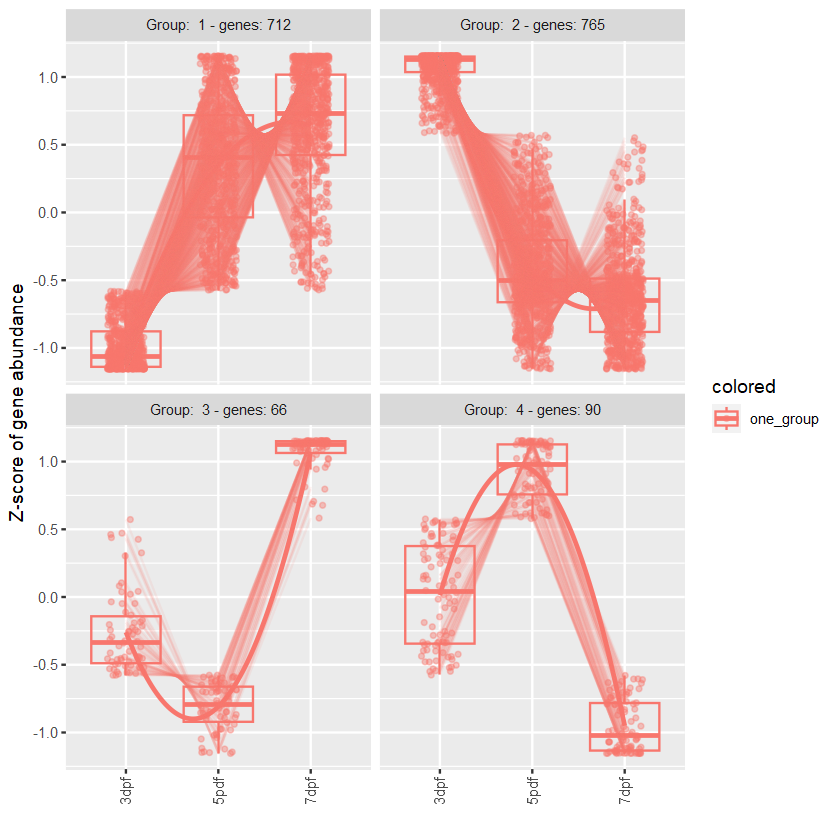

In [27]:
ma<-assay(ma)
clusterpatternplot<-degPatterns(
    ma = ma,
    metadata = colData(dds),
    time = "sample_group",
    minc = 50)#performs pairwise correlation between sig genes derived from LRT test and group them into clusters
    

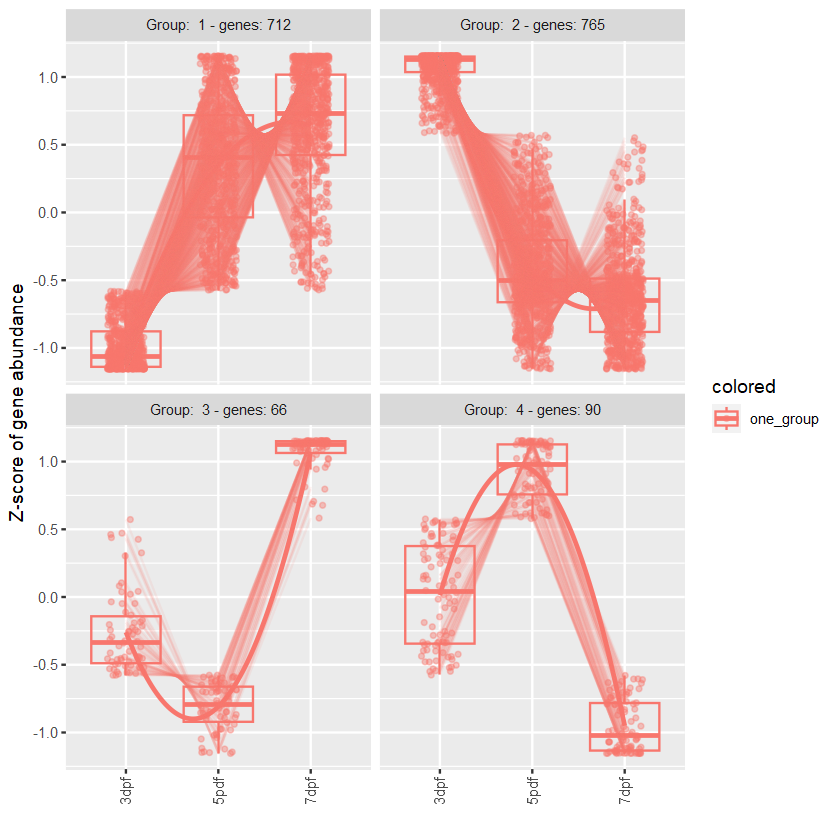

$df
                                genes cluster
ENSDARG00000000001 ENSDARG00000000001       1
ENSDARG00000000002 ENSDARG00000000002       2
ENSDARG00000000069 ENSDARG00000000069       2
ENSDARG00000000103 ENSDARG00000000103       2
ENSDARG00000000241 ENSDARG00000000241       2
ENSDARG00000000370 ENSDARG00000000370       3
ENSDARG00000000837 ENSDARG00000000837       4
ENSDARG00000001127 ENSDARG00000001127       3
ENSDARG00000001234 ENSDARG00000001234       2
ENSDARG00000001303 ENSDARG00000001303       1
ENSDARG00000001572 ENSDARG00000001572       1
ENSDARG00000001782 ENSDARG00000001782       1
ENSDARG00000001785 ENSDARG00000001785       3
ENSDARG00000001803 ENSDARG00000001803       1
ENSDARG00000001993 ENSDARG00000001993       2
ENSDARG00000001994 ENSDARG00000001994       2
ENSDARG00000001999 ENSDARG00000001999       2
ENSDARG00000002084 ENSDARG00000002084       4
ENSDARG00000002165 ENSDARG00000002165       1
ENSDARG00000002196 ENSDARG00000002196       2
ENSDARG00000002197 ENSDARG0000

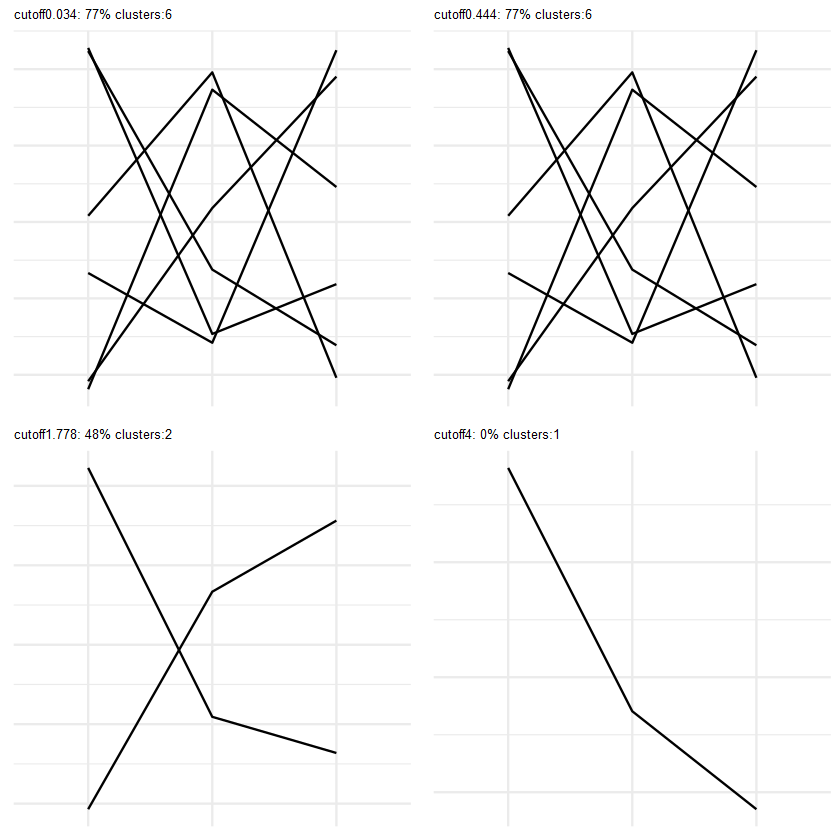

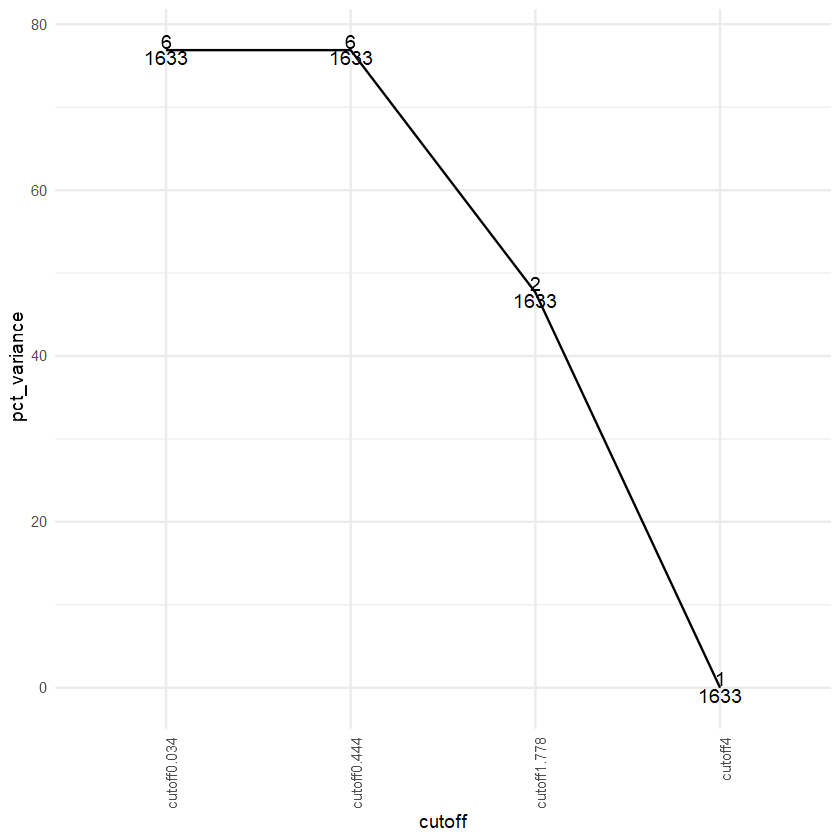

In [28]:
clusterpatternplot 

In [29]:
DEGclusters<-clusterpatternplot[["df"]] # extracting the genes which belong to each cluster
head(DEGclusters)

genes              cluster
ENSDARG00000000001 ENSDARG00000000001 1      
ENSDARG00000000002 ENSDARG00000000002 2      
ENSDARG00000000069 ENSDARG00000000069 2      
ENSDARG00000000103 ENSDARG00000000103 2      
ENSDARG00000000241 ENSDARG00000000241 2      
ENSDARG00000000370 ENSDARG00000000370 3

We see that cluster 1 and 2 are age-dependant changes in the mg
that are linear; therefore we can select them here 

In [30]:
cluster1<-subset(DEGclusters, cluster == 1, select = "genes")
cluster2<-subset(DEGclusters, cluster == 2, select = "genes")